In [2]:
from lime.lime_tabular import LimeTabularExplainer
import pandas as pd
import sklearn
import joblib
import numpy as np

### Loading pretrained models

In [3]:
#rf = joblib.load('../models/rf.joblib') - tutaj jest cos popsute i bedzie potrzebna poprawka
xgb = joblib.load('../models/xgb.joblib')

### Loading the data

In [64]:
X_train = pd.read_csv("../data/processed/SCVIC/X_train.csv")
y_train = pd.read_csv("../data/processed/SCVIC/y_train.csv")

X_test = pd.read_csv("../data/processed/SCVIC/X_test.csv")
y_test = pd.read_csv("../data/processed/SCVIC/y_test.csv")

### LIME

In [109]:
explainer = LimeTabularExplainer(
    X_train.values, 
    feature_names=list(X_train.columns), 
    random_state=42,
    class_names=list(np.unique(y_train.values)),
    #mode='classification'
    #discretize_continuous=True
    )

Example observation

In [7]:
#observation = train.iloc[[0]]
observation = X_train.iloc[[0]]

observation

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,4003080,4,2,124.0,62.0,31.0,31.0,31.0,0.0,31.0,...,3,8,0.0,0.0,0.0,0.0,1.450000e+15,0.0,1.450000e+15,1.450000e+15


In [8]:
observation = observation.iloc[0]
observation

Flow Duration                 4.003080e+06
Total Fwd Packet              4.000000e+00
Total Bwd packets             2.000000e+00
Total Length of Fwd Packet    1.240000e+02
Total Length of Bwd Packet    6.200000e+01
                                  ...     
Active Min                    0.000000e+00
Idle Mean                     1.450000e+15
Idle Std                      0.000000e+00
Idle Max                      1.450000e+15
Idle Min                      1.450000e+15
Name: 0, Length: 76, dtype: float64

In [58]:
explanation = explainer.explain_instance(
    data_row = observation,
    predict_fn = lambda d: xgb.predict_proba(d), # according to documentation for sklearn it has to be predict_proba (https://lime-ml.readthedocs.io/en/latest/lime.html?highlight=explain_instance#lime.lime_tabular.RecurrentTabularExplainer.explain_instance)
    num_samples= 1000000 # more samples => potentially better reproducability
)

/Users/ppopiolek/miniconda3/envs/xai/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/ppopiolek/miniconda3/envs/xai/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/ppopiolek/miniconda3/envs/xai/lib/python3.11/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

In [59]:
explanation.as_list()

[('Idle Max <= 1450000000000000.00', -0.006553168769952819),
 ('Fwd Seg Size Min <= 20.00', -0.004311462517845531),
 ('FWD Init Win Bytes <= 257.00', 0.001793382308116437),
 ('Bwd Init Win Bytes <= 0.00', 0.0015096334778450574),
 ('Fwd Packets/s <= 4.40', 0.0011660585514028485),
 ('Bwd IAT Std <= 0.00', -0.0010088087846901752),
 ('Idle Mean <= 1450000000000000.00', -0.000981598271717234),
 ('Fwd URG Flags <= 0.00', 0.0008588421880399104),
 ('0.50 < Fwd Packet Length Mean <= 31.00', 0.0006545290407275899),
 ('URG Flag Count <= 0.00', 0.0005835958142927982)]

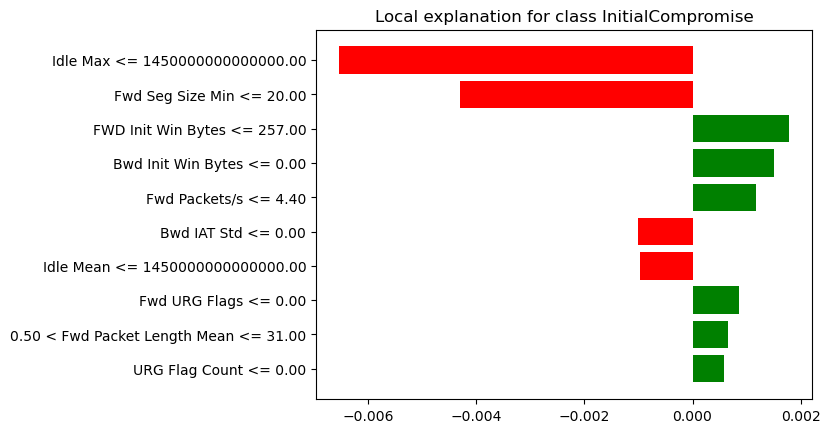

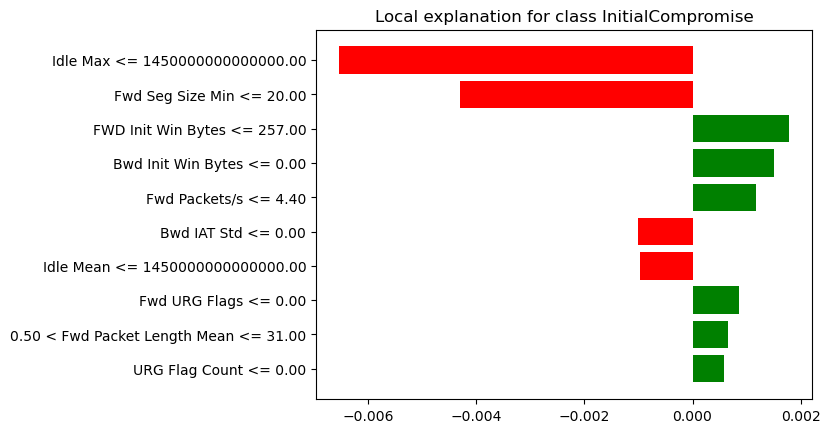

In [60]:
explanation.as_pyplot_figure()

#### kernel size experiments

In [61]:
explainer2 = LimeTabularExplainer(
    X_train.values, 
    feature_names=list(X_train.columns), 
    random_state=42,
    class_names=list(np.unique(y_train.values)),
    # default is None... Hoever in the implementation we can find:  if kernel_width is None:  kernel_width = np.sqrt(training_data.shape[1]) * .75
    kernel_width= 200.0 
    )

In [62]:
explanation2 = explainer2.explain_instance(
    data_row = observation,
    predict_fn = lambda d: xgb.predict_proba(d), # according to documentation for sklearn it has to be predict_proba (https://lime-ml.readthedocs.io/en/latest/lime.html?highlight=explain_instance#lime.lime_tabular.RecurrentTabularExplainer.explain_instance)
    num_samples= 1000000 # more samples => potentially better reproducability
)

/Users/ppopiolek/miniconda3/envs/xai/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/ppopiolek/miniconda3/envs/xai/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/ppopiolek/miniconda3/envs/xai/lib/python3.11/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

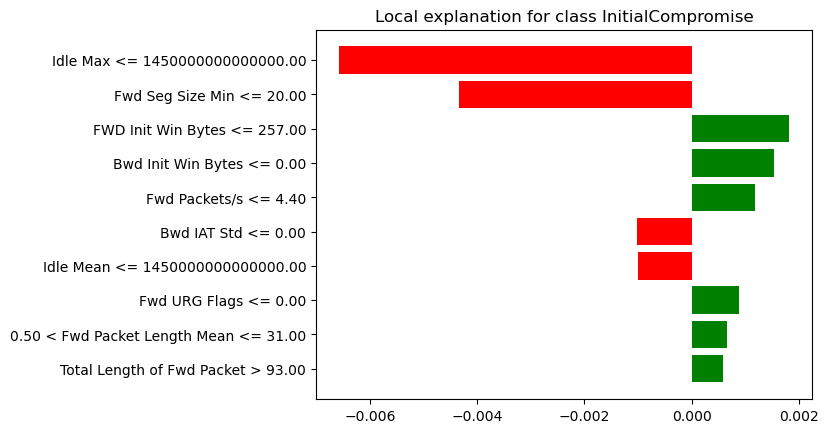

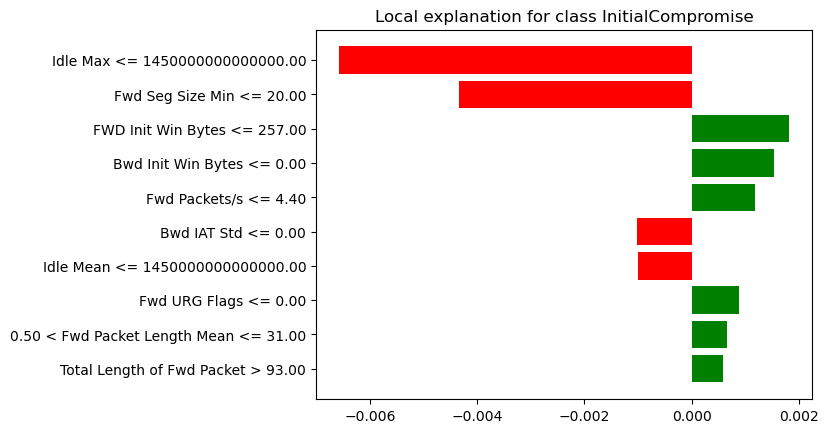

In [63]:
explanation2.as_pyplot_figure()

Particular observations

In [77]:
predictions = xgb.predict_proba(X_test)

<Axes: >

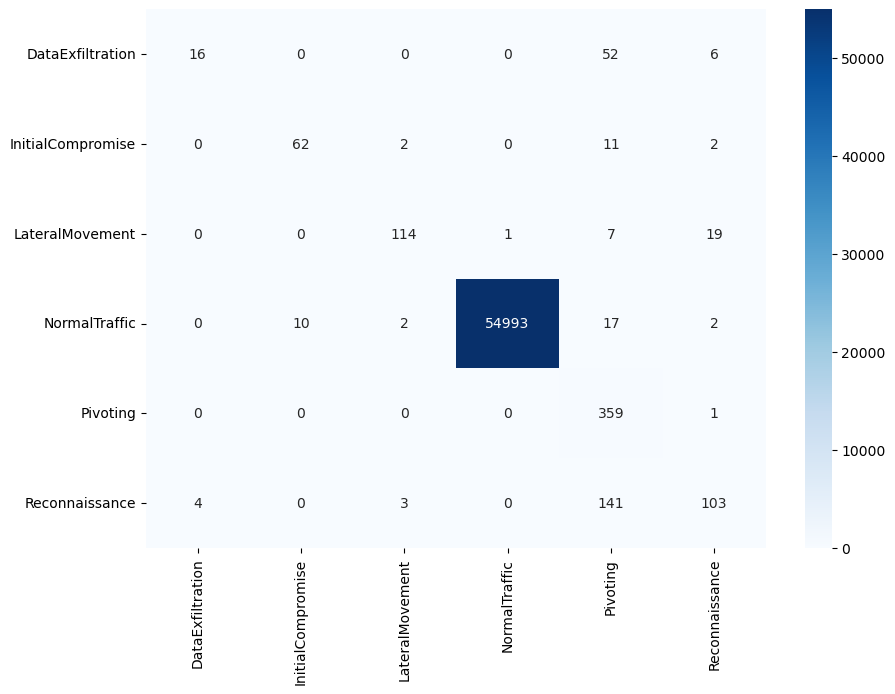

In [76]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predicted_indices = np.argmax(predictions, axis=1)

class_labels = np.unique(y_train.values)

predicted_labels = [class_labels[i] for i in predicted_indices]

actual_labels = y_test['Label'].tolist()  # Dostosuj 'Label' do nazwy twojej kolumny

conf_matrix = confusion_matrix(actual_labels, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)


As evident in the model, a notable discrepancy is observed, particularly in the context of the Pivoting class, which is erroneously assigned a significant number of samples that do not belong to this class. This issue is most apparent when examining the Data Exfiltration and Reconnaissance classes. To investigate this, we will utilize the LIME method, to the extent possible, to discern the underlying reasons for this occurrence. To achieve this, we will first examine sample instances from the misclassified classes and then employ averaging of results across multiple samples. At this juncture, we acknowledge that LIME may not be the most optimal method for this scenario, but the focus here is on its application.

In [79]:
# identify missclaffied samples indexes


# Reconnaissance ---> Pivoting

R_missclassified_indices = []

for i in range(len(actual_labels)):
    if actual_labels[i] == 'Reconnaissance' and predicted_labels[i] == 'Pivoting':
        R_missclassified_indices.append(i)

print(R_missclassified_indices)



# DataExfiltration ---> Pivoting

DE_missclassified_indices = []

for i in range(len(actual_labels)):
    if actual_labels[i] == 'DataExfiltration' and predicted_labels[i] == 'Pivoting':
        DE_missclassified_indices.append(i)

print(DE_missclassified_indices)


[38346, 38363, 38746, 39085, 39290, 39952, 41803, 41821, 41823, 41960, 41987, 42382, 42412, 42513, 42554, 42829, 42849, 43050, 43051, 43077, 43412, 43486, 43905, 43926, 43998, 44031, 44074, 44282, 44460, 44479, 44736, 44784, 44829, 44854, 45097, 45306, 45333, 45494, 45537, 45556, 45594, 45902, 46077, 46111, 46330, 46474, 46497, 46538, 46569, 46605, 46625, 46771, 46800, 46823, 46888, 46924, 47073, 47091, 47282, 47303, 47496, 47513, 47715, 47744, 47931, 47978, 48261, 48292, 48496, 48516, 48740, 48962, 48978, 49168, 49197, 49423, 49492, 49610, 49624, 49716, 49743, 49761, 49762, 49781, 49786, 49806, 49807, 49826, 49840, 49858, 49912, 49930, 49932, 49962, 50100, 50151, 50198, 50218, 50331, 50407, 50432, 50455, 50586, 50631, 50665, 50688, 50877, 50917, 50954, 50971, 51105, 51146, 51198, 51347, 51384, 51428, 51453, 51582, 51592, 51594, 51636, 51672, 51701, 51775, 51835, 51864, 51902, 51933, 52116, 52155, 52215, 52283, 52286, 52749, 52750, 52751, 52752, 52780, 52781, 52783, 52784]
[48050, 4835

In [108]:
observations_DE.head()

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
48050,59835,2,2,128,160,128,0,64.000000,90.509668,160,...,0,32,0,0,0,0,1.602470e+15,0.0,1.602470e+15,1.602470e+15
48352,58656,2,2,128,160,128,0,64.000000,90.509668,160,...,0,32,0,0,0,0,1.602470e+15,0.0,1.602470e+15,1.602470e+15
48433,60928,3,2,128,160,90,0,42.666667,45.181117,160,...,1,32,0,0,0,0,1.602470e+15,0.0,1.602470e+15,1.602470e+15
48589,53700,2,2,128,160,128,0,64.000000,90.509668,160,...,0,32,0,0,0,0,1.602470e+15,0.0,1.602470e+15,1.602470e+15
48652,59566,3,2,128,160,90,0,42.666667,45.181117,160,...,1,32,0,0,0,0,1.602470e+15,0.0,1.602470e+15,1.602470e+15


In [82]:
X_test.shape

(55927, 76)

In [92]:
observations_DE = X_test.iloc[DE_missclassified_indices]
observations_R = X_test.iloc[R_missclassified_indices]

In [103]:
observations_DE.iloc[0]

Flow Duration                 5.983500e+04
Total Fwd Packet              2.000000e+00
Total Bwd packets             2.000000e+00
Total Length of Fwd Packet    1.280000e+02
Total Length of Bwd Packet    1.600000e+02
                                  ...     
Active Min                    0.000000e+00
Idle Mean                     1.602470e+15
Idle Std                      0.000000e+00
Idle Max                      1.602470e+15
Idle Min                      1.602470e+15
Name: 48050, Length: 76, dtype: float64

In [88]:
explainer = LimeTabularExplainer(
    X_train.values,  
    feature_names=list(X_train.columns), 
    random_state=42,
    class_names=list(np.unique(y_train.values)), 
    #mode='classification'
    #discretize_continuous=True
    )

In [140]:
explanationDE = explainer.explain_instance(
    data_row = observations_DE.iloc[0],
    predict_fn = lambda d: xgb.predict_proba(d), # according to documentation for sklearn it has to be predict_proba (https://lime-ml.readthedocs.io/en/latest/lime.html?highlight=explain_instance#lime.lime_tabular.RecurrentTabularExplainer.explain_instance)
    num_samples= 1000000, # more samples => potentially better reproducability
    #top_labels = 3
    labels = [0, 1, 2, 3, 4, 5]
    
)

/Users/ppopiolek/miniconda3/envs/xai/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/ppopiolek/miniconda3/envs/xai/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/ppopiolek/miniconda3/envs/xai/lib/python3.11/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

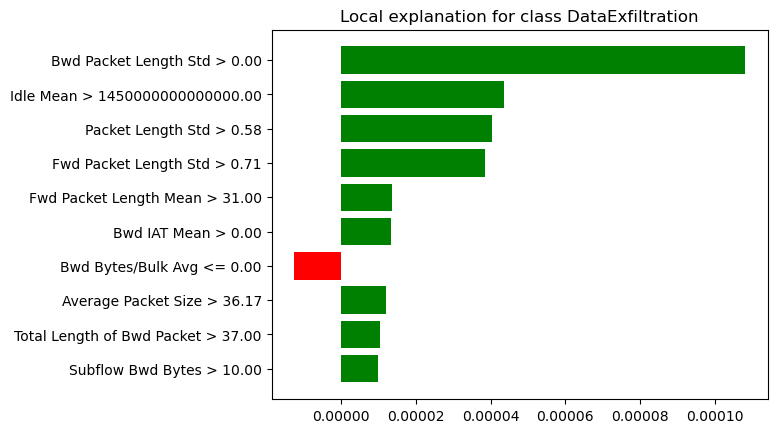

In [142]:
explanationDE.as_pyplot_figure(label=0);

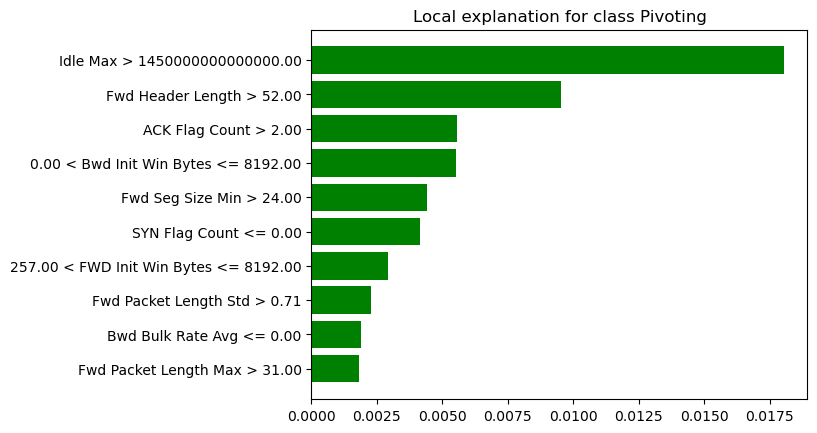

In [143]:
explanationDE.as_pyplot_figure(label=4);

For the given example of the misclassified group (from DataExfiltraion), it can be observed that despite a high positive indication for choosing a particular class based on many attributes, these attributes vary between classes. This suggests that the issue might be resolvable by selecting specific attributes for detection in each class (meaning that each class would have its own set of attributes for detection). To further substantiate this, a similar consideration should be conducted for a larger number of samples of this misclassification. For this reason, LIME will be employed for all misclassified examples from the given set, and ultimately, appropriate metrics will be applied for a more precise approximation of the result.

In [171]:
# create a list of explanations for each example

explanationsDE = [0] * len(observations_DE)
i = 0 

for index, observation in observations_DE.iterrows():
    explanationsDE[i] = explainer.explain_instance(
        data_row = observation,
        predict_fn = lambda d: xgb.predict_proba(d), # according to documentation for sklearn it has to be predict_proba (https://lime-ml.readthedocs.io/en/latest/lime.html?highlight=explain_instance#lime.lime_tabular.RecurrentTabularExplainer.explain_instance)
        num_samples= 10000, # more samples => potentially better reproducability
        #top_labels = 3
        labels = [0, 4]
    )
    i = i + 1

/Users/ppopiolek/miniconda3/envs/xai/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/ppopiolek/miniconda3/envs/xai/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/ppopiolek/miniconda3/envs/xai/lib/python3.11/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

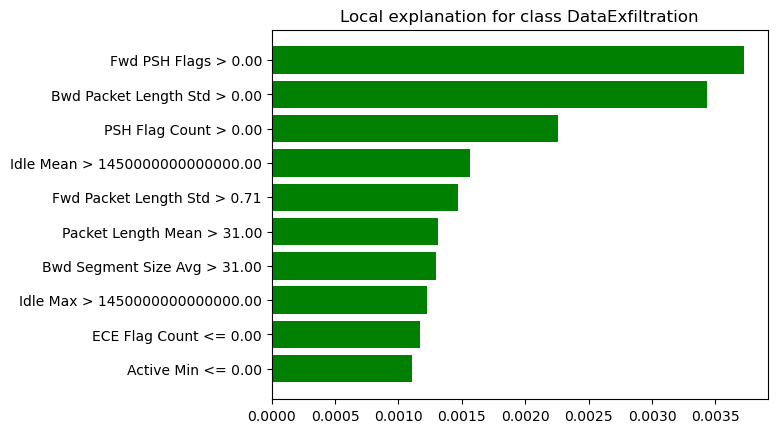

In [165]:
explanationsDE[5].as_pyplot_figure(label = 0);

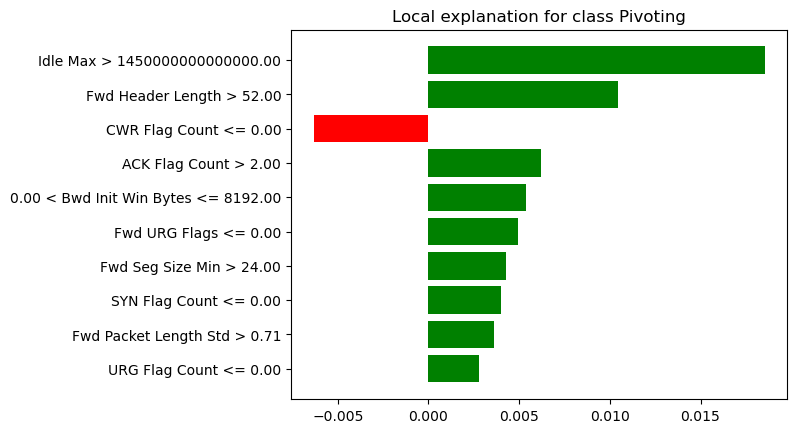

In [219]:
explanationsDE[5].as_pyplot_figure(label = 4);

In light of the explanations for individual instances, it becomes evident where the issues in labeling lie. However, to grasp the full picture and utilize LIME effectively, one must adopt a technique that offers a coherent view of all misclassified samples. Therefore, as a first step, let's attempt to find and illustrate the distribution of the ten most frequently recurring explanations for all samples in the group. This will be done for both the impact on the class the sample was supposed to be classified as (DataExfiltration) and the class to which the sample was erroneously classified (Pivoting).

In [222]:
import matplotlib.pyplot as plt

def collect_values(explanationsDE, label):
    values_collection = {}
    for i in range(len(explanationsDE)):
        tuple_list = explanationsDE[i].as_list(label=label)
        for key, value in tuple_list:
            if key in values_collection:
                values_collection[key].append(value)
            else:
                values_collection[key] = [value]
    return values_collection

def plot_histograms(explanationsDE, label, common_x_scale = True, figure_title="Figure"):
    collected_values = collect_values(explanationsDE, label)

    # Sorting keys by the number of values, in descending order
    sorted_keys = sorted(collected_values, key=lambda k: len(collected_values[k]), reverse=True)

    # Selecting the top 10 keys
    top_10_keys = sorted_keys[:10]

    # Determining common x-axis scale if needed
    all_values = np.concatenate([collected_values[key] for key in top_10_keys])
    x_min, x_max = min(all_values), max(all_values)


    # Drawing histograms
    fig, axs = plt.subplots(len(top_10_keys), figsize=(10, 15), tight_layout=True)
    fig.suptitle(figure_title, fontsize=16)
    for i, key in enumerate(top_10_keys):
        axs[i].hist(collected_values[key], bins=60, range=(x_min, x_max) if common_x_scale else None, edgecolor='black')
        axs[i].set_title(f'Histogram for Key: {key} (Total Values: {len(collected_values[key])})')
        axs[i].set_xlabel('Values')
        axs[i].set_ylabel('Frequency')

    plt.show()


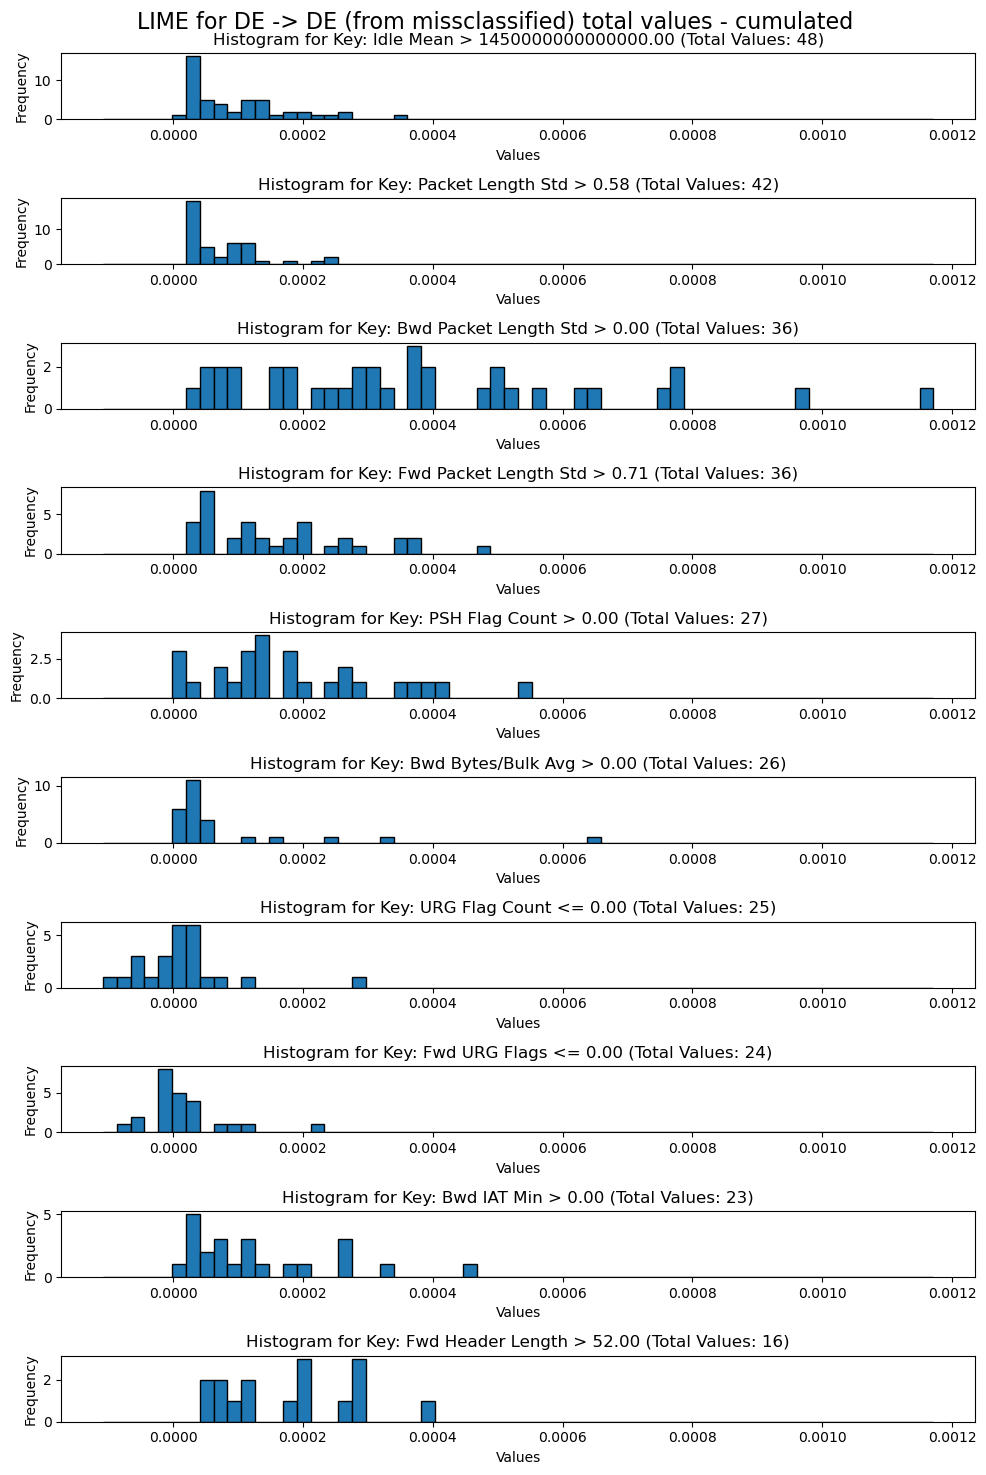

In [223]:
label = 0
plot_histograms(explanationsDE, label, figure_title="LIME for DE -> DE (from missclassified) total values - cumulated")

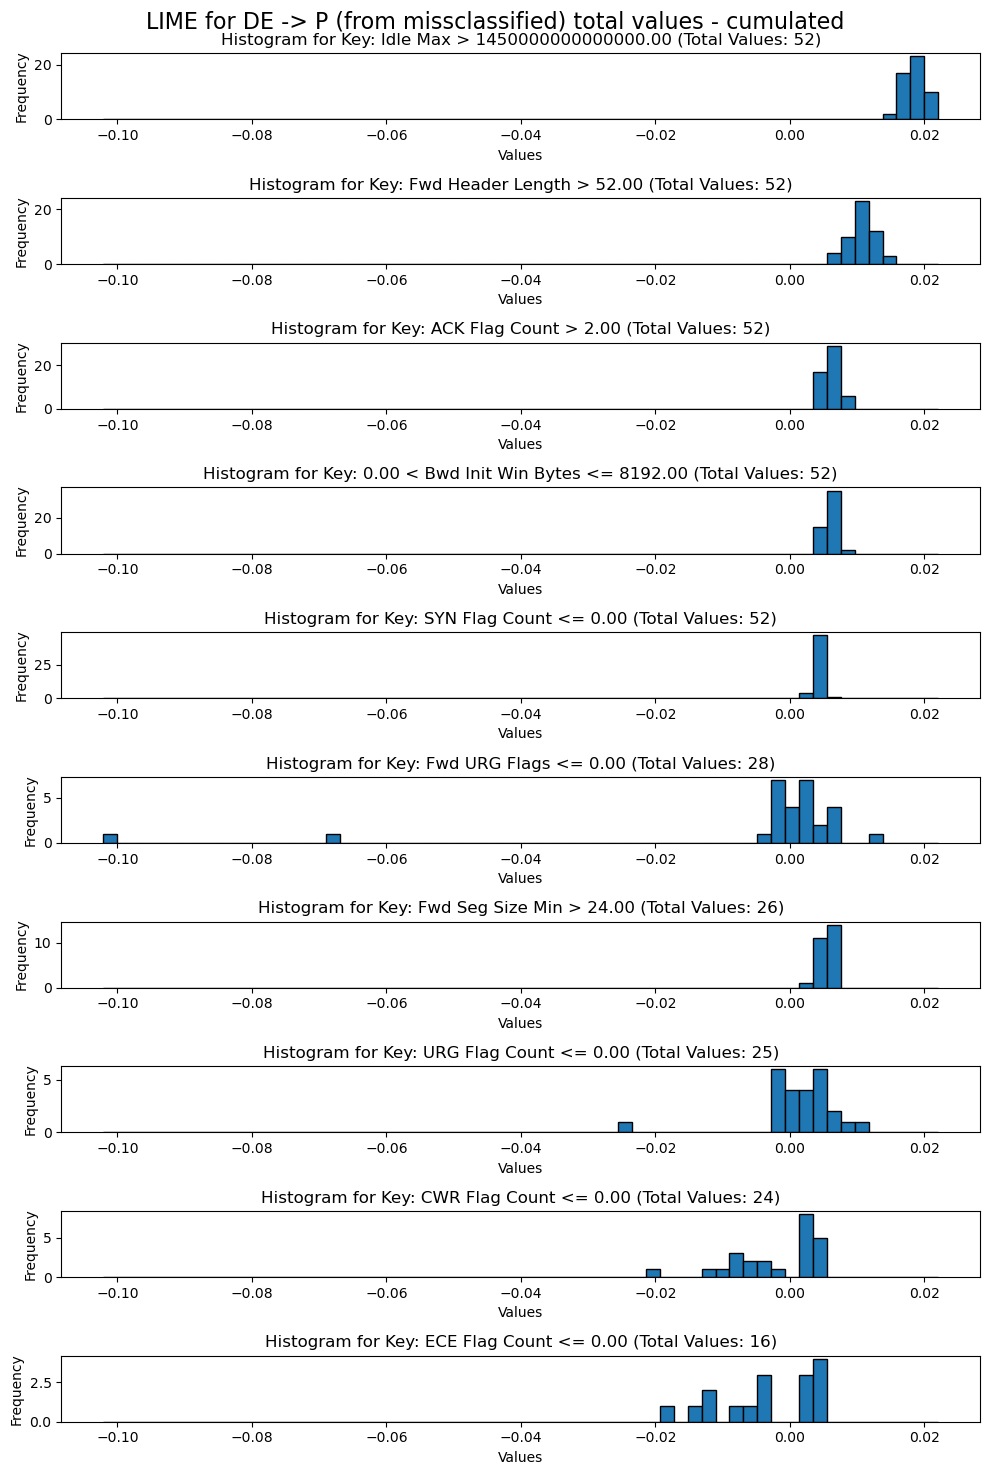

In [224]:
label = 4
plot_histograms(explanationsDE, label, figure_title="LIME for DE -> P (from missclassified) total values - cumulated")

Above, we observe the influence of attributes using the previously described technique. But is this approach sufficient? The distributions show that we often deal with many samples fluctuating around low values or inconsistencies between separate explanations (i.e., for one sample, a certain attribute significantly hindered while for another, it greatly aided). We aim to transform this situation to observe attributes that distinctly and unequivocally influenced the incorrect classification of a sample (DE -> P chart). Therefore, instead of counting the number of samples, we will apply the summation of values in terms of their impact. Finally, we will take the absolute value of the 10 most influential attributes (taking the absolute value of the sum, rather than summing the absolute values of individual explanations, will eliminate inconsistent explanations - for example, a few samples with high impact and a few with low impact - in our case, they will cancel each other out).

In [211]:
import matplotlib.pyplot as plt
import numpy as np

def collect_values_and_sum(explanationsDE, label):
    values_collection = {}
    sum_values = {}
    for i in range(len(explanationsDE)):
        tuple_list = explanationsDE[i].as_list(label=label)
        for key, value in tuple_list:
            # Collect values
            if key in values_collection:
                values_collection[key].append(value)
            else:
                values_collection[key] = [value]
            # Sum values (without abs) and then take abs of the sum
            if key in sum_values:
                sum_values[key] += value
            else:
                sum_values[key] = value

    # Apply abs to the sums
    sum_values = {k: abs(v) for k, v in sum_values.items()}
    return values_collection, sum_values

def plot_histograms_by_sum(explanationsDE, label, common_x_scale=True, figure_title="Figure"):
    collected_values, sum_values = collect_values_and_sum(explanationsDE, label)

    # Sorting keys by the absolute sum of values, in descending order
    sorted_keys = sorted(sum_values, key=sum_values.get, reverse=True)

    # Selecting the top 10 keys
    top_10_keys = sorted_keys[:10]

    # Determining common x-axis scale if needed
    all_values = np.concatenate([collected_values[key] for key in top_10_keys])
    x_min, x_max = min(all_values), max(all_values)

    # Drawing histograms
    fig, axs = plt.subplots(len(top_10_keys), figsize=(10, 15), tight_layout=True)
    fig.suptitle(figure_title, fontsize=16)
    for i, key in enumerate(top_10_keys):
        axs[i].hist(collected_values[key], bins=60, range=(x_min, x_max) if common_x_scale else None, edgecolor='black')
        axs[i].set_title(f'Histogram for Key: {key} (Absolute Sum of Values: {sum_values[key]:.4f})')
        axs[i].set_xlabel('Values')
        axs[i].set_ylabel('Frequency')

    plt.show()



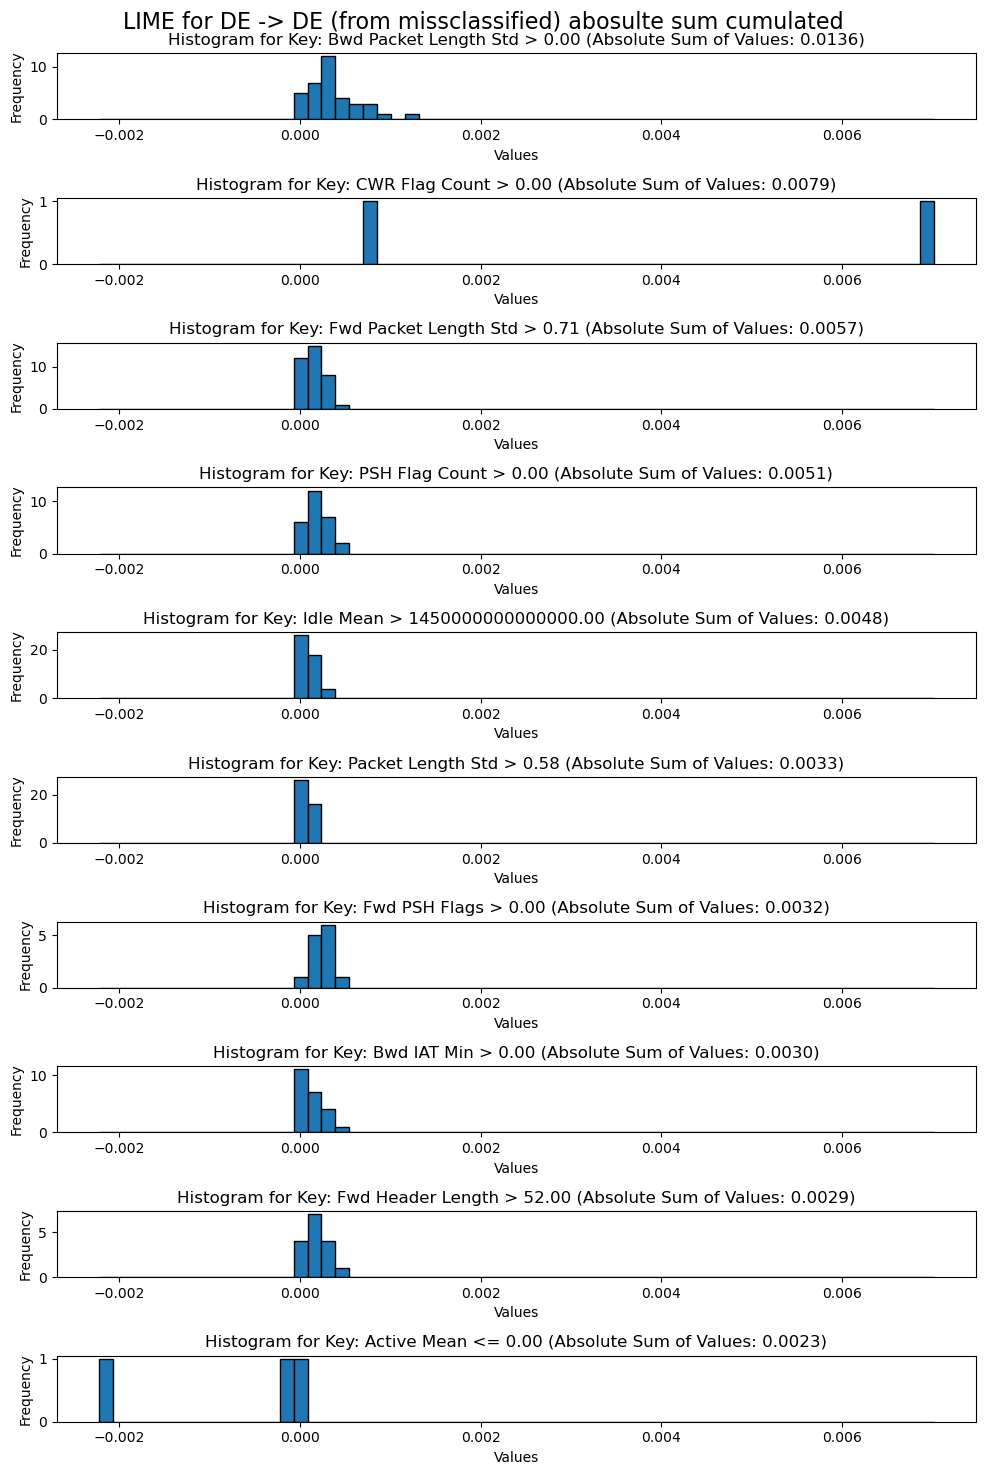

In [217]:
label = 0
plot_histograms_by_sum(explanationsDE, label, common_x_scale=True, figure_title="LIME for DE -> DE (from missclassified) abosulte sum cumulated")

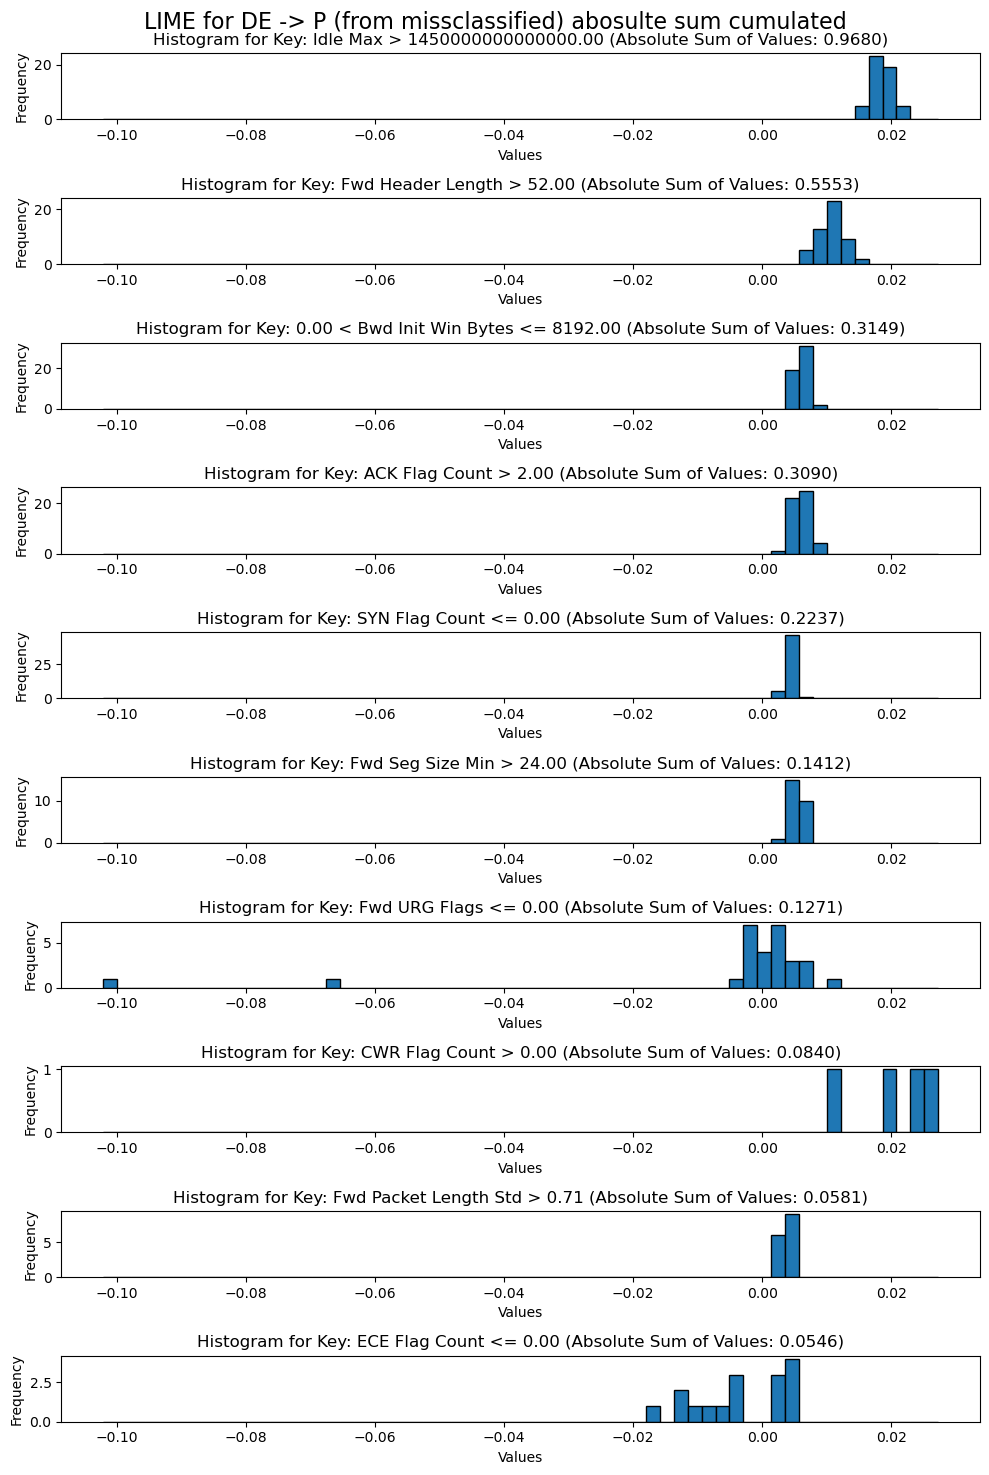

In [218]:
label = 4
plot_histograms_by_sum(explanationsDE, label, common_x_scale=True, figure_title="LIME for DE -> P (from missclassified) abosulte sum cumulated")

As we can see, for samples incorrectly classified, there is a significantly higher cumulative impact of explanations for individual samples on the final prediction compared to the class to which the sample should have belonged. Additionally, we observe that these attributes differ in both cases, which unequivocally indicates the possibility of compensating for the difference through appropriate feature engineering.